In [1]:
import numpy as np
import scipy.optimize as opt
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
s_r = np.array([2.504, 2.000, 320e-3, -8e-3, -272e-3, -456e-3, -576e-3, -688e-3, -752e-3, -880e-3, -960e-3, -1.056, -1.16, -1.184, -1.211])

s = s_r +1.211

v = np.array([160e-3, 200e-3, 1 , 1.56, 2.28, 3, 3.56, 4.20, 4.68, 5.72, 6.52, 7.56 , 8.6, 9.4, 9.88])

v_vo = v / 10


In [3]:
def exp_fit(t, A, B):
    return A * np.exp(-t / B)


In [15]:
pars, cov = opt.curve_fit(exp_fit, s, v_vo, [10, 0.0047])

[A, B] = pars
errs = np.sqrt(np.diag(cov))
[A_err, B_err] = errs

volts_pred = exp_fit(np.linspace(0,3.7), A, B)


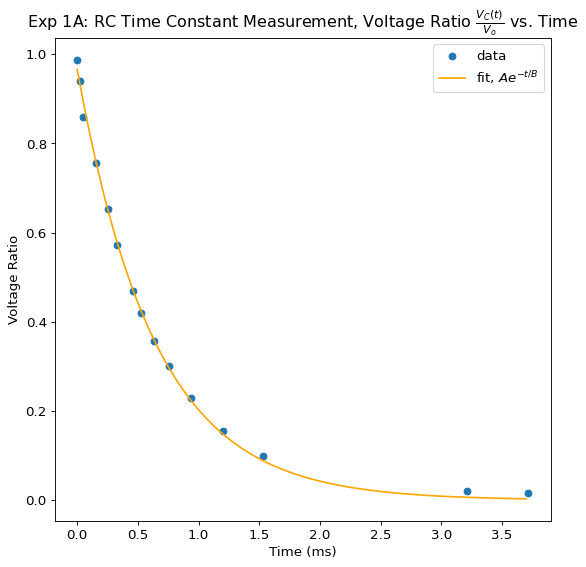

In [22]:
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.scatter(s, v_vo, label="data")
plt.plot(np.linspace(0,3.7), volts_pred, color='orange', label=r'fit, $A e^{-t/B}$')

plt.title(r"Exp 1A: RC Time Constant Measurement, Voltage Ratio $\frac{V_C(t)}{V_o}$ vs. Time")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage Ratio")

plt.legend(loc=1)
plt.show()
